<a href="https://colab.research.google.com/github/guimontico/priceActionFinder/blob/master/notebooks/projeto_Stockalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the alpha vantage API
!pip install alpha_vantage

In [22]:
#import libraries
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [61]:
from pandas_datareader import data as web
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [23]:
#set the key and the output format 
ALPHA_VANTAGE_API_KEY = 'FAMIMUBSM0W9GBRE'
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [97]:
#selected the company: Petrobras (PBR)
intraday_data, data_info = ts.get_intraday(symbol='USDJPY', outputsize='full', interval='15min')

#Export the result to a csv
intraday_data_PBR.to_csv('PBR_new.csv')

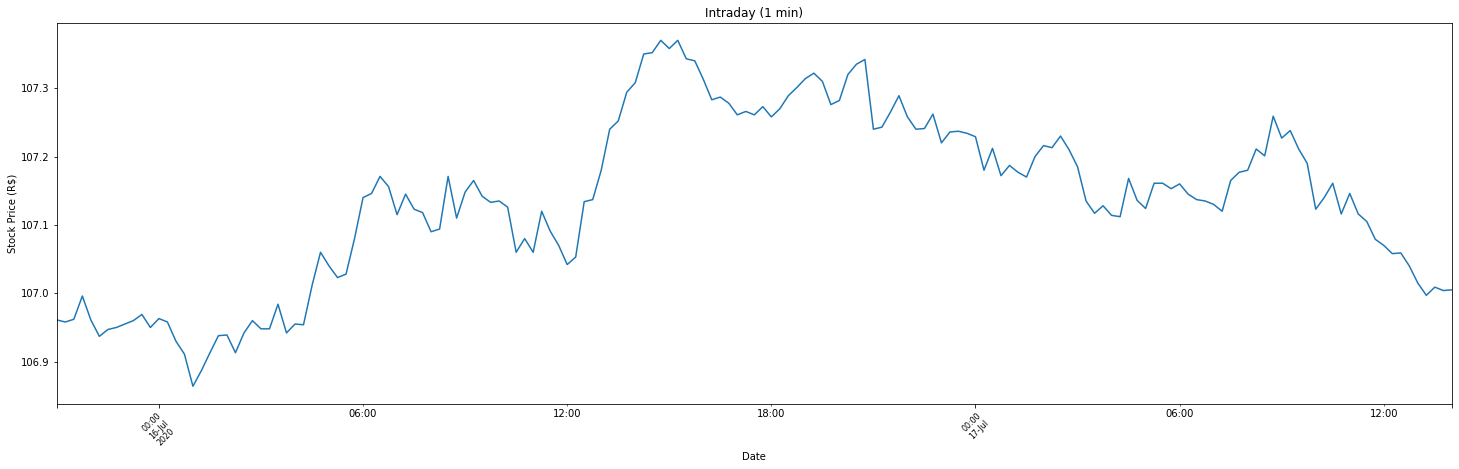

In [98]:
#Verifying all the data
plt.figure(figsize=(25,7))
intraday_data['1. open'].plot()
plt.xticks(rotation='45', fontsize = 8)
plt.ylabel('Stock Price (R$)')
plt.xlabel('Date')
plt.title('Intraday (1 min)')
plt.show()

In [99]:
#looking at the dataset
intraday_data.sort_values(by='date', ascending=True)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-15 21:00:00,106.961,106.981,106.900,106.958,0.0
2020-07-15 21:15:00,106.958,106.969,106.900,106.940,0.0
2020-07-15 21:30:00,106.962,107.033,106.902,106.986,0.0
2020-07-15 21:45:00,106.996,107.001,106.910,106.961,0.0
2020-07-15 22:00:00,106.961,107.000,106.890,106.935,0.0
...,...,...,...,...,...
2020-07-17 13:00:00,107.015,107.040,106.970,107.002,0.0
2020-07-17 13:15:00,106.997,107.030,106.960,107.000,0.0
2020-07-17 13:30:00,107.009,107.020,106.960,107.000,0.0


In [100]:
intraday_data.columns = ['Open', 'High', 'Low', 'Close', 'volume'] 
intraday_data.head()

,Open,High,Low,Close,volume
date,,,,,
2020-07-17 14:00:00,107.005,107.013,106.93,106.970,0.0
2020-07-17 13:45:00,107.004,107.011,106.96,107.003,0.0
2020-07-17 13:30:00,107.009,107.020,106.96,107.000,0.0
2020-07-17 13:15:00,106.997,107.030,106.96,107.000,0.0
2020-07-17 13:00:00,107.015,107.040,106.97,107.002,0.0


In [101]:
trace1 = {
    'x': intraday_data.index,
    'open': intraday_data.Open,
    'close': intraday_data.Close,
    'high': intraday_data.High,
    'low': intraday_data.Low,
    'type': 'candlestick',
    'name': 'PBR',
    'showlegend': True
}

In [102]:
data = [trace1]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'USD/JPY',
        'font': {
            'size': 10
        }
    }
})

In [103]:
fig = go.Figure(data=data, layout=layout)
fig.write_html("Microsoft(MSFT) Moving Averages.html")
fig.show()